In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [18]:
df=pd.read_csv('../dataset_encoded.csv')
df.head()

,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,location_On campus,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes,adjusted_emissions
0,0,1,26-50,61k–80k,3,<=20,18.6,20,9,24.0,...,False,False,True,False,False,False,True,True,False,24.000000
1,1,2,26-50,41k–60k,3,21-40,116.0,330,28,118.0,...,False,True,False,False,False,False,True,True,False,118.000000
2,2,3,26-50,41k–60k,7,41-60,116.0,3020,48,116.0,...,False,False,False,True,False,False,True,True,False,116.000000
3,3,4,<=20,21k–40k,5,21-40,18.6,60,34,13.0,...,False,False,True,False,False,True,False,True,True,42.666667
4,4,5,<=20,≤20k,3,41-60,18.6,100,45,23.0,...,False,False,True,False,False,False,False,False,False,23.000000


In [19]:
def compute_trip_cost(row):
    distance = row["travel_distance_exp"]
    cost_per_km = 0
    # Base cost per km by mode
    if row["mode_transportation_Private"]:
        cost_per_km = 11  # average cost per km for car (gotten by 17km/l and fuel 187/l so for 1km = 187/17 = 11)
    elif row["mode_transportation_Taxi"]:
        base = 270
        inc = 55   
    elif row["mode_transportation_Public Transport"]:
        cost_per_km = 2  # average cost per km for public transport
    elif row["mode_transportation_Walking"]:
        cost_per_km = 0 # average cost per km for motorcycle
    else:  #Motorbike
        cost_per_km = 3

    # Distance ranges to approximate km
   

    trip_distance_km = distance
    if  row["mode_transportation_Taxi"] and trip_distance_km > 10:
        trip_cost = base + (inc * (trip_distance_km-10))
    elif row["mode_transportation_Taxi"] and trip_distance_km <= 10:
        trip_cost = base  # minimum fare for taxi
    else: 
        trip_cost = trip_distance_km * cost_per_km

    return trip_cost
df["trip_cost"] = df.apply(compute_trip_cost, axis=1)

In [20]:
#showing variance in trip cost vs mode of transport
transport=["mode_transportation_Taxi","mode_transportation_Public Transport","mode_transportation_Walking","mode_transportation_Private"]


In [21]:
# here i will be comparing the effect adoption of carpooling has on the economy(trip cost)
base = 270
inc = 55  
def adjusting_tripcost(row):
    distance = row["travel_distance_exp"]
    trip_distance_km = distance

    if row["adoption_yes"] & row["mode_transportation_Taxi"]:
        return row["trip_cost"]/3
    elif row['adoption_yes'] &  row["mode_transportation_Taxi"]==False:
        if distance<10:
            trip_cost = base
            return trip_cost/3
        else:
            trip_cost = base + (inc * (trip_distance_km-10))
            return trip_cost/3
    else: 
        return row["trip_cost"]

df["adjusted_cost"]=df.apply(adjusting_tripcost,axis=1)
        
df.head()


,Unnamed: 0,id,age,income,trip_frequency,travel_distance,g_per_km,trip_cost,travel_distance_exp,emissions_exp,...,mode_transportation_Private,mode_transportation_Public Transport,mode_transportation_Taxi,mode_transportation_Walking,purpose_study,purpose_work,infrastructure_adequacy_yes,adoption_yes,adjusted_emissions,adjusted_cost
0,0,1,26-50,61k–80k,3,<=20,18.6,18,9,24.0,...,False,True,False,False,False,True,True,False,24.000000,90.000000
1,1,2,26-50,41k–60k,3,21-40,116.0,308,28,118.0,...,True,False,False,False,False,True,True,False,118.000000,420.000000
2,2,3,26-50,41k–60k,7,41-60,116.0,2360,48,116.0,...,False,False,True,False,False,True,True,False,116.000000,786.666667
3,3,4,<=20,21k–40k,5,21-40,18.6,68,34,13.0,...,False,True,False,False,True,False,True,True,42.666667,530.000000
4,4,5,<=20,≤20k,3,41-60,18.6,90,45,23.0,...,False,True,False,False,False,False,False,False,23.000000,731.666667


In [22]:
df.columns

Index(['Unnamed: 0', 'id', 'age', 'income', 'trip_frequency',
       'travel_distance', 'g_per_km', 'trip_cost', 'travel_distance_exp',
       'emissions_exp', 'age_exp', 'income_exp', 'gender_Male',
       'reason_comfort', 'reason_safety', 'reason_travel time',
       'reason_trip cost', 'reason_trip distance', 'reason_trip origin',
       'status_Students', 'location_On campus', 'mode_transportation_Private',
       'mode_transportation_Public Transport', 'mode_transportation_Taxi',
       'mode_transportation_Walking', 'purpose_study', 'purpose_work',
       'infrastructure_adequacy_yes', 'adoption_yes', 'adjusted_emissions',
       'adjusted_cost'],
      dtype='object')

In [23]:
y=df['adjusted_cost']
X=df.drop(columns=['emissions_exp','id','age','income','travel_distance','adjusted_emissions','trip_cost','g_per_km','adjusted_cost','mode_transportation_Walking'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=df["adoption_yes"],
    random_state=42
)

In [24]:
lrmodel=LinearRegression()
lrmodel.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred=lrmodel.predict(X_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 1124.3672731780555
RMSE: 33.53158620134239
MAE: 24.15505228498396
R² Score: 0.9951427654050756


In [ ]:
 
reg1 = LinearRegression()
reg2 = DecisionTreeRegressor(random_state=42)
reg3 = RandomForestRegressor(random_state=42)
#reg4 = SVR()

voting_reg = VotingRegressor(
    estimators=[
        ('lr', reg1),
        ('dt', reg2),
        ('rf', reg3),
        #('svr', reg4)
    ]
)

voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


MSE: 124.9504241475731
RMSE: 11.178122568104767
MAE: 8.051684094994648
R² Score: 0.999460217726629


In [ ]:
def plot_linear_feature_importance(model, feature_names, top_n=15, figsize=(10, 8)):
    """
    Plot feature importance for Linear Regression as bar chart
    """
    if not hasattr(model, 'coef_'):
        raise ValueError("Model must be a fitted linear model")
    
    # Get coefficients
    coefficients = model.coef_
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(coefficients),
        'coefficient': coefficients
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    colors = ['red' if coef < 0 else 'blue' for coef in importance_df['coefficient']]
    
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color=colors, alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Absolute Coefficient Value')
    
    model_type = type(model).__name__
    plt.title(f'{model_type} Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (importance, coef) in enumerate(zip(importance_df['importance'], importance_df['coefficient'])):
        plt.text(importance + 0.01, i, f'{coef:.3f}', va='center', fontsize=10)
    
    # Add legend
    plt.legend(handles=[
        plt.Rectangle((0,0),1,1, color='blue', alpha=0.7, label='Positive Impact'),
        plt.Rectangle((0,0),1,1, color='red', alpha=0.7, label='Negative Impact')
    ])
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

In [ ]:
def plot_voting_regressor_feature_importance(voting_reg, feature_names, top_n=15, figsize=(12, 8)):
    """
    Plot feature importance for Voting Regressor as bar chart
    """
    if not hasattr(voting_reg, 'named_estimators_'):
        raise ValueError("Model must be a fitted VotingRegressor")
    
    importances = []
    model_names = []
    
    # Collect importances from all models in the ensemble
    for name, model in voting_reg.named_estimators_.items():
        if hasattr(model, 'feature_importances_'):
            importances.append(model.feature_importances_)
            model_names.append(name)
        elif hasattr(model, 'coef_'):
            coef_importance = np.abs(model.coef_)
            importances.append(coef_importance)
            model_names.append(name)
    
    if not importances:
        raise ValueError("No models with feature importance available")
    
    # Calculate average importance
    avg_importance = np.mean(importances, axis=0)
    
    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_importance
    }).sort_values('importance', ascending=True).tail(top_n)
    
    # Create bar chart
    plt.figure(figsize=figsize)
    bars = plt.barh(range(len(importance_df)), importance_df['importance'], color='orange', alpha=0.7)
    
    plt.yticks(range(len(importance_df)), importance_df['feature'])
    plt.xlabel('Average Importance Score')
    plt.title(f'Voting Regressor Feature Importance (Top {top_n})')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, importance in enumerate(importance_df['importance']):
        plt.text(importance + 0.001, i, f'{importance:.3f}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    return importance_df.sort_values('importance', ascending=False)

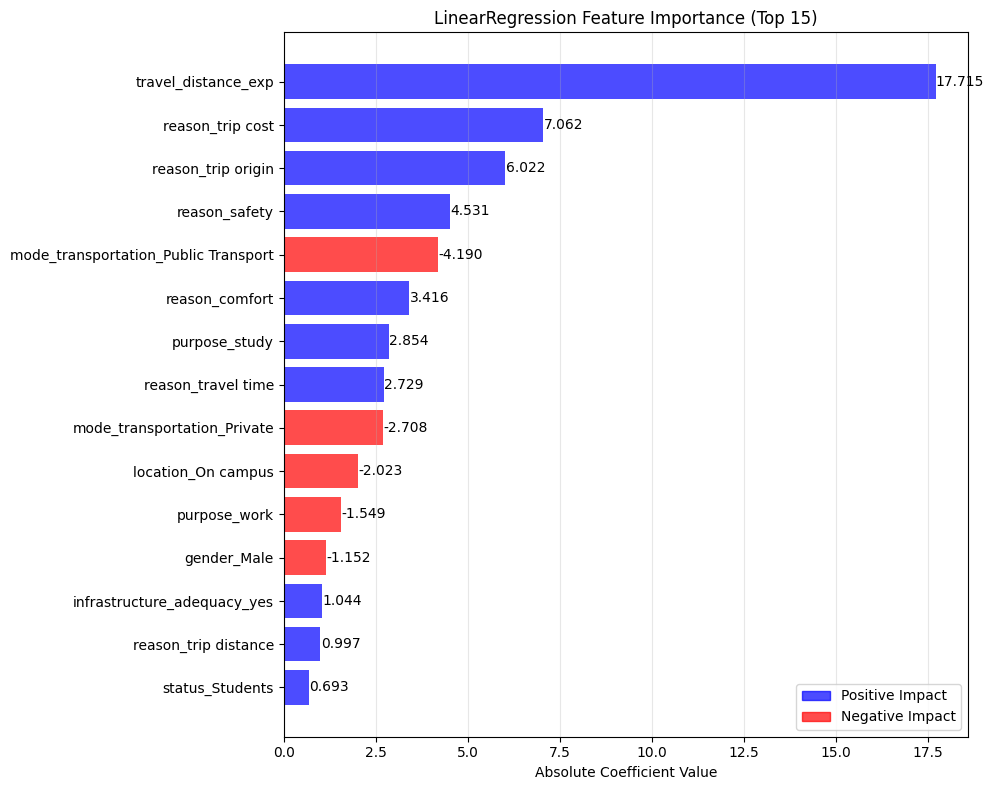

In [ ]:
feature_names=X.columns
regressionplot=plot_linear_feature_importance(lrmodel, feature_names)

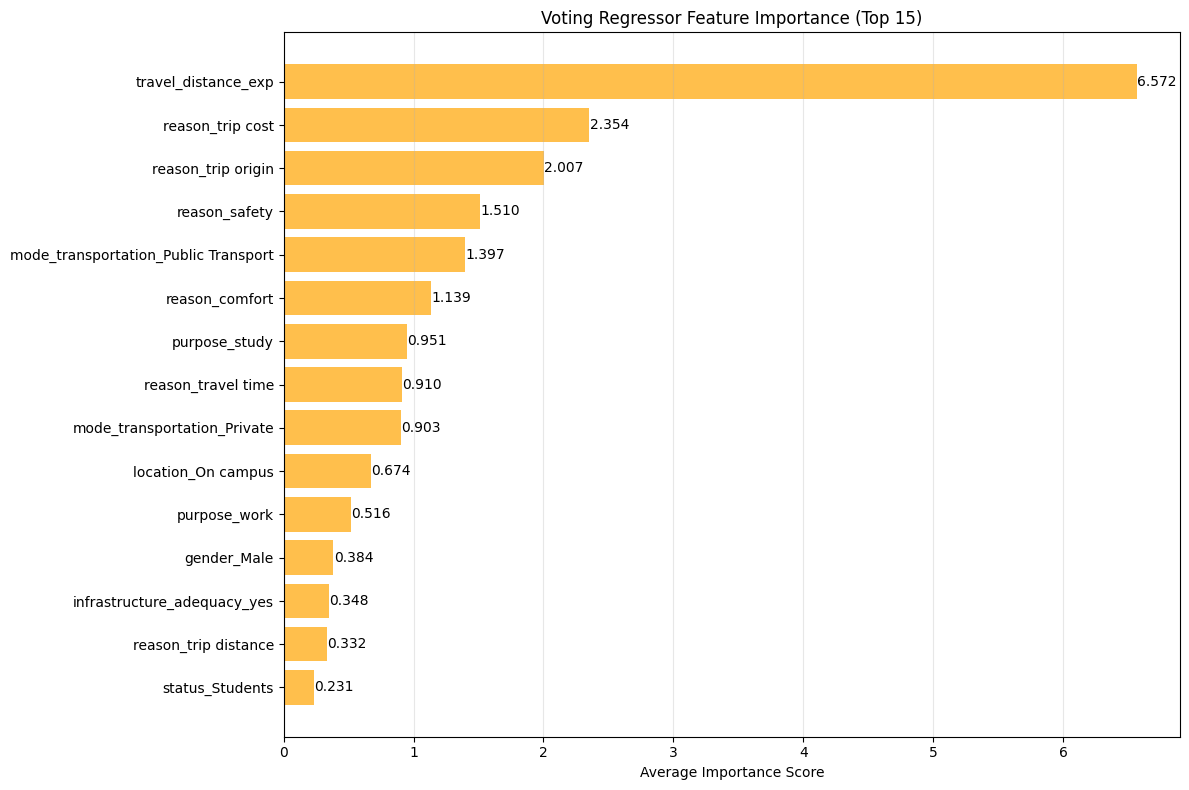

In [ ]:
votingplot=plot_voting_regressor_feature_importance(voting_reg,feature_names)

In [ ]:
# statistical test to see if there is a significant difference in emissions between adopters and non-adopters
# perfoming a t-test on adoption vs trip cost
#--- IGNORE ---
# Ho : There is no significant difference in trip cost between adopters and non-adopters
# Ha : There is a significant difference in trip cost between adopters and non-adopters
from scipy.stats import ttest_ind
df=df.copy()
group1 = df[df['adoption_yes'] == True]['adjusted_cost']
group2 = df[(df['adoption_yes'] == False) & 
            (df['mode_transportation_Taxi'] == True)]['adjusted_cost']

t, p = ttest_ind(group1, group2)
print(t, p)

0.19728448880997015 0.843660596254045
